In [1]:
import numpy as np
import os
# from PIL import Image
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
from NIIReader.Augmentation import dataAugmentation

## Load Teammate's data and Plot

### Processed data
* each npy file is an array with [# of image, 2, 240, 240], concatenated with [6720, 2, 240,240] size.

In [4]:
orig_path = './../dataset/orig'
data_path = './../dataset/processed/temp'

In [4]:
data = []
for f in os.listdir(data_path):
    data.append(np.load(os.path.join(data_path, f)))

data = np.concatenate(data, axis = 0)
data.shape

(6720, 2, 240, 240)

In [57]:
resize_data = np.zeros((6720, 2, 256, 256))
print(resize_data.shape)
print(resize_data[0].shape)
print(resize_data[0][0].shape)
print(data[0][0][:5, :5])
print(resize_data[0][0][:5, :5])

# oimg = data[0]
# rimg = resize_data[0]
# print(oimg.shape, rimg.shape) 
# rimg[0].fill(oimg[0][0][0])
# print(rimg[0])
# rimg[0][8:248, 8:248] = oimg[0][:, :]

for oimg, rimg in zip(data, resize_data):
    # print(oimg.shape, rimg.shape) # (2, 240, 240) (2, 256, 256)
    rimg[0].fill(oimg[0][0][0])
    rimg[0][8:248, 8:248] = oimg[0][:, :]
    rimg[1].fill(oimg[1][0][0])
    rimg[1][8:248, 8:248] = oimg[1][:, :]

(6720, 2, 256, 256)
(2, 256, 256)
(256, 256)
[[102.35 102.35 102.35 102.35 102.35]
 [102.35 102.35 102.35 102.35 102.35]
 [102.35 102.35 102.35 102.35 102.35]
 [102.35 102.35 102.35 102.35 102.35]
 [102.35 102.35 102.35 102.35 102.35]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [58]:
# 第一个slice的数据是
print(data[0].shape)
print(resize_data[0].shape)

(2, 240, 240)
(2, 256, 256)


In [60]:
print(data[0][0])
print(resize_data[0][0])

[[102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 ...
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]]
[[102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 ...
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]
 [102.35 102.35 102.35 ... 102.35 102.35 102.35]]


In [61]:
print(data[0][1])
print(resize_data[0][1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


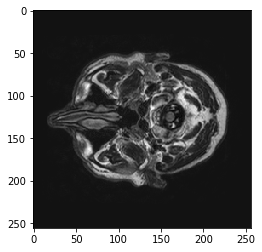

In [62]:
# 对于[2, 240, 240] 的数据，第一维[240, 240]是原始图像
plt.imshow(data[0][0], cmap = 'gray')

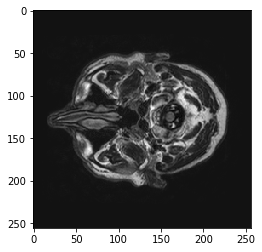

In [63]:
plt.imshow(resize_data[0][0], cmap = 'gray')

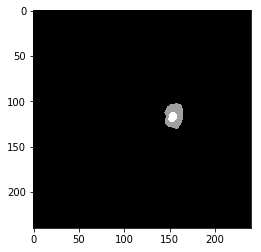

In [14]:
# 对于[2, 240, 240] 的数据，第二维[240, 240]是原始图像
plt.imshow(data[0][1], cmap = 'gray')

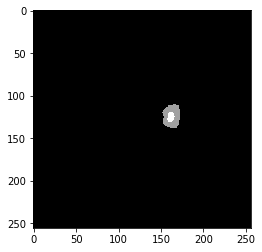

In [64]:
plt.imshow(resize_data[0][1], cmap = 'gray')

### Explore Original Segmentation data
* shape: [240, 240, 48]

In [5]:
seg_data = nib.load(os.path.join(orig_path+'/1/segm.nii.gz')).get_fdata()
seg_data.shape

(240, 240, 48)

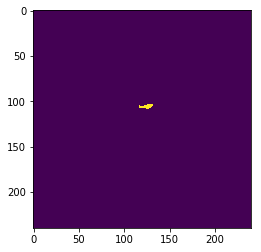

In [6]:
plt.imshow(seg_data[:, :, 43])

### Read original .nii.gz file

#### Explore data 

Shape (240, 240, 48)


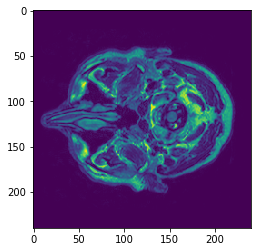

In [7]:
FLAIR = nib.load(os.path.join(orig_path+'/1/orig/FLAIR.nii.gz')).get_fdata()
print('Shape', FLAIR.shape)
plt.imshow(FLAIR[:,:,0])

Shape (240, 240, 48)


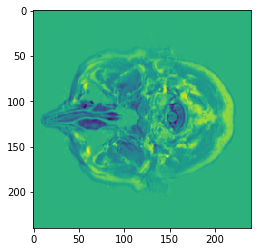

In [8]:
reg_IR = nib.load(os.path.join(orig_path+'/1/orig/reg_IR.nii.gz')).get_fdata()
print('Shape', reg_IR.shape)
plt.imshow(reg_IR[:,:,0])

In [9]:
IR = nib.load(os.path.join(orig_path+'/1/orig/IR.nii.gz')).get_fdata()
print('Shape', IR.shape)

Shape (240, 240, 48)


Shape (240, 240, 48)


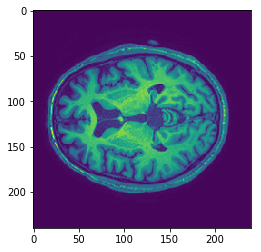

In [10]:
reg_T1 = nib.load(os.path.join(orig_path+'/1/orig/reg_T1.nii.gz')).get_fdata()
print('Shape', reg_T1.shape)
plt.imshow(reg_T1[:, :, 20])

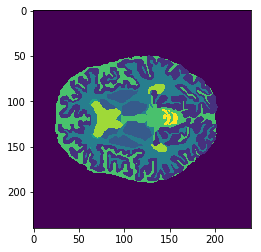

In [11]:
mask = nib.load(os.path.join(orig_path+'/1/segm.nii.gz')).get_fdata()
mask.shape
plt.imshow(mask[:, :, 20])